## Bewertungsaspekte für Sentiment-Lexika
| Kürzel | Aspekt                        | Beschreibung                                                               |
|--------|-------------------------------|----------------------------------------------------------------------------|
| A1     | **Erstellungsmethodik**       | Manuell durch Human Rater? Automatisch? Hybrid? Dokumentiert?              |
| A2     | **Skalierung / Polaritätsmodell** | Binär, kontinuierlich oder andere?                                     |
| A3     | **Evaluation in Studien**     | Wurde das Lexikon in realen Benchmarks/Tasks evaluiert? Nachvollziehbar?   |
| A4     | **Domänenvielfalt**           | Wurde es für verschiedene Textsorten getestet oder entwickelt?             |

**Bewertungsskala (0–3):**
- `0`: Keine Angabe / nicht dokumentiert
- `1`: Gering / eingeschränkt
- `2`: Mittelmäßig / teilweise erfüllt
- `3`: Hoch / vollständig erfüllt

<!-- **Aspekt Gewichtung:** Alt
- A1 (Erstellungsmethodik) = 0.50
- A2 (Skalierung) = 0.20
- A3 (Evaluation) = 0.15
- A4 (Domänenvielfalt) = 0.15 -->

**Aspekt Gewichtung:**
- A1 (Erstellungsmethodik) = 0.40
- A2 (Skalierung) = 0.15
- A3 (Evaluation) = 0.30
- A4 (Domänenvielfalt) = 0.15


## Gesamtübersicht

| Lexikon  | A1 | A2 | A3 | A4    | raw\_score |
| -------- | -- | -- | -- | ----- | ---------- |
| SentiWS  | 2  | 3  | 2  | 2     | **0.717**  |
| PolArt   | 2  | 2  | 2  | 1     | **0.617**  |
| AffNorms | 1  | 3  | 2  | 2     | **0.583**  |
| GPC      | 2  | 2  | 3  | 1     | **0.717**  |
| ALPIN    | 3  | 3  | 2  | 2     | **0.850**  |
| Morph    | 3  | 1  | 2  | 2     | **0.750**  |
| UniSent  | 2  | 1  | 2  | 1     | **0.517**  |
| MLSA     | 3  | 3  | 2  | 3     | **0.900**  |
| ANGST    | 3  | 3  | 2  | 1     | **0.800**  |
| AffDict  | 3  | 3  | 2  | 1     | **0.800**  |


In [ ]:
weights = {"A1": 0.40, "A2": 0.15, "A3": 0.30, "A4": 0.15}

# ratings for each lexicon
ratings = {
    "SentiWS":  {"A1": 2, "A2": 3, "A3": 2, "A4": 2},
    "PolArt":   {"A1": 2, "A2": 2, "A3": 2, "A4": 1},
    "AffNorms": {"A1": 1, "A2": 3, "A3": 2, "A4": 2},
    "GPC":      {"A1": 2, "A2": 2, "A3": 3, "A4": 1},
    "ALPIN":    {"A1": 3, "A2": 3, "A3": 2, "A4": 2},
    "Morph":    {"A1": 3, "A2": 1, "A3": 2, "A4": 2},
    "UniSent":  {"A1": 2, "A2": 0, "A3": 2, "A4": 1},
    "MLSA":     {"A1": 3, "A2": 3, "A3": 2, "A4": 3},
    "ANGST":    {"A1": 3, "A2": 3, "A3": 2, "A4": 1},
    "AffDict":  {"A1": 3, "A2": 3, "A3": 2, "A4": 1},
}

# compute weighted score
def compute_score(rating):
    score = 0
    for aspect, value in rating.items():
        score += (value/3) * weights[aspect]
    return round(score, 3)

lexicon_scores = {lex: compute_score(r) for lex, r in ratings.items()}
print(lexicon_scores)

{'SentiWS': 0.717, 'PolArt': 0.617, 'AffNorms': 0.583, 'GPC': 0.717, 'ALPIN': 0.85, 'Morph': 0.75, 'UniSent': 0.517, 'MLSA': 0.9, 'ANGST': 0.8, 'AffDict': 0.8}


## Weighted Average Ansatz

In [ ]:
# Weighted Average approach 
import pandas as pd
import numpy as np

df = pd.read_csv("sentiment_lexika_scaled_final.csv")

weights = {
    "SentiWS": 0.717,
    "PolArt_num": 0.617,
    "GPC_num": 0.717,
    "Morph_num": 0.750,
    "MLSA": 0.900,
    "UniSent": 0.567,
    "ALPIN_sentiment_scaled": 0.850,
    "AffNorms_Val_scaled": 0.583,
    "ANGST_Valence_scaled": 0.800,
    "AffDict_Eval_scaled": 0.800
}

# Extract relevant columns
lex_cols = list(weights.keys())

# Function to calculate the weighted mean
def weighted_mean(row):
    values = []
    w = []
    for col in lex_cols:
        val = row[col]
        
        # Special case: skip MLSA == 0.0, e.g. "schwach" MLSA 0.0
        if col == "MLSA" and val == 0.0:
            continue
        
        if not pd.isna(val):
            values.append(val)
            w.append(weights[col])
    
    if values:
        return round(np.average(values, weights=w), 4)
    else:
        return np.nan

# Compute new column
df["weighted_avg_score"] = df.apply(weighted_mean, axis=1)

# Create new CSV with only the desired columns
output_df = df[["ID", "Wort", "weighted_avg_score"]]
output_df.to_csv("aggregated_sentiment_scores_.csv", index=False)

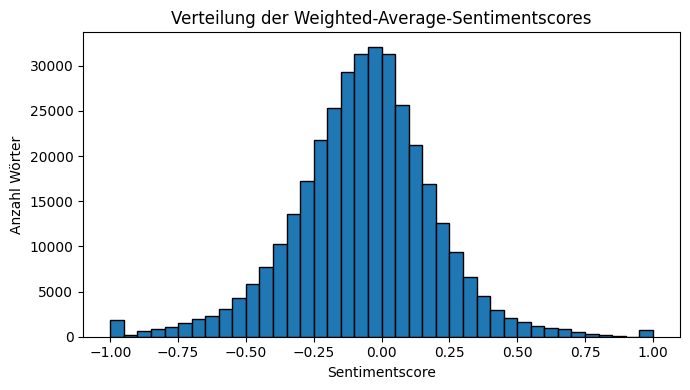

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("aggregated_sentiment_scores_.csv")

# Histogramm der Scores
plt.figure(figsize=(7, 4))
plt.hist(df["weighted_avg_score"].dropna(), bins=40, range=(-1, 1), edgecolor="black")
plt.xlabel("Sentimentscore")
plt.ylabel("Anzahl Wörter")
plt.title("Verteilung der Weighted-Average-Sentimentscores")

plt.tight_layout()
plt.savefig("hist_weighted_avg.png", dpi=300)
plt.show()

## Bayes-light (SentiMerge ähnlich)
### Referenz SentiMerge:
- ### https://github.com/guyemerson/SentiMerge/tree/master
- ### https://github.com/guyemerson/SentiMerge/blob/master/src/main/bayes.py
----------------------------------------------------
**Ziel**
- Kombiniere 10 Lexika pro Wort zu einem Score.  
- Schätze pro Lexikon eine datengetriebene *Zuverlässigkeit* (Fehlervarianzen aus Overlaps).  
- Aggregiere mit **Präzisionsgewichtung** + schwachem **Prior** (Shrinkage Richtung 0).  
  - *Präzision* = 1 / Varianz  
- Gib zusätzlich ein grobes 95%-Konfidenzintervall aus.  

**Wichtige Designentscheidungen**
- **MLSA==0.0** wird ignoriert (Sonderregel, da unplausibel).  
- **Varianzschätzung**: statt klassischem Mittelwert-basiertem Verfahren wird die  
  **Median Absolute Deviation (MAD)** genutzt:  
  - robust gegen Ausreißer, wenn ein Lexikon extrem von den anderen abweicht
  - stabil bei kleinen Overlap-Mengen (2–4 Quellen pro Wort).  
- **VAR_FLOOR / VAR_CEIL** stabilisieren numerisch:  
  - *VAR_FLOOR*: verhindert unendliche Gewichte (bei Varianz=0).  
  - *VAR_CEIL*: deckelt Varianzen >1, da Werte ohnehin in [-1,1] liegen.  
- **Shrinkage-Prinzip**: Wenn wenige Quellen vorliegen, wird der Score leicht in Richtung 0 „gezogen“.  
  - verhindert Überkonfidenz, wenn nur 1–2 Lexika beteiligt sind.  

**Output**
- CSV-Datei mit Spalten:  
  - `ID`  
  - `Wort`  
  - `senti_merge_score` (kombinierter Score)  
  - `ci_lower`, `ci_upper` (95%-Konfidenzintervall)  
  - `lex_weight` (Gesamtgewicht / Präzision)  
  - `n_sources` (Anzahl beitragender Lexika) 

In [ ]:
import time
import numpy as np
import pandas as pd
from tqdm import tqdm

# Column names
LEX_COLS = [
    "SentiWS",
    "PolArt_num",
    "GPC_num",
    "Morph_num",
    "MLSA",
    "UniSent",
    "ALPIN_sentiment_scaled",
    "AffNorms_Val_scaled",
    "ANGST_Valence_scaled",
    "AffDict_Eval_scaled",
]

# Numerical safeguards for variance estimators
# Prevents variance = 0 (infinite precision) and caps unrealistic variances
VAR_FLOOR = 0.001

# Values are in [-1, 1]; error variances >>1.0 are implausible
VAR_CEIL  = 1.0   

def is_valid_value(col: str, v) -> bool:
    """
     An entry may contribute to the combination if:
    - it is not NaN
    - AND (for MLSA) it is not exactly 0.0 (special rule)
    """
    if pd.isna(v):
        return False
    if col == "MLSA" and float(v) == 0.0:
        return False
    return True

def robust_variance(values: np.ndarray) -> float:
    """
    Robust variance estimation via MAD (Median Absolute Deviation).
    For (approximately) normally distributed data:
        Variance ≈ (1.4826 * MAD)^2
    If MAD = 0 then fallback: sample variance.
    """
    x = np.asarray(values, dtype=float)
    if x.size < 2:
        return np.nan
    median = np.median(x)
    mad = np.median(np.abs(x - median))
    var_mad = (1.4826 * mad) ** 2
    if var_mad <= 0:
        # All residuals identical -> use classical variance (if possible)
        return np.var(x, ddof=1) if x.size >= 2 else np.nan
    return var_mad

def estimate_source_variances(df: pd.DataFrame, lex_cols: list[str]) -> tuple[dict, dict]:
    """
    Estimates an error variance sigma_i^2 per lexicon i from overlap residual
    Returns:
      variances: dict[col -> estimated variance (clamped)]
      counts:    dict[col -> number of residuals used (overlap count)]
    """
    variances, counts = {}, {}

    # Prepare: per row, a list of (source, value) valid entries
    rows_sources = []
    for row in df.itertuples(index=False):
        items = []
        for col in lex_cols:
            v = getattr(row, col)
            if is_valid_value(col, v):
                items.append((col, float(v)))
        rows_sources.append(items)

    # Collect residuals per source
    for col in lex_cols:
        residuals = []
        for items in rows_sources:
            # Is source col present in this row?
            if not any(s == col for s, _ in items):
                continue
            # Is there at least one other source in this row?
            others = [v for s, v in items if s != col]
            if len(others) == 0:
                continue
            # Value of source col
            v_col = next(v for s, v in items if s == col)
            # Consensus of the others (robust)
            consensus = np.median(others)
            residuals.append(v_col - consensus)

        # Robust variance of residuals
        var_col = robust_variance(np.array(residuals))
        # Numerical stabilization (no 0, no huge weight)
        if not np.isnan(var_col):
            var_col = float(np.clip(var_col, VAR_FLOOR, VAR_CEIL))

        variances[col] = var_col
        counts[col] = len(residuals)

    return variances, counts

def choose_prior_variance(source_vars: dict) -> float:
    """
    Chooses the prior variance (shrinkage strength) as the median of the source variances.
    Interpretation:
      - Small prior_var  => strong prior (pulls more toward 0)
      - Large prior_var  => weak prior (less shrinkage)
    """
    vals = [v for v in source_vars.values() if not np.isnan(v)]
    return float(np.median(vals)) if vals else 0.5  # Fallback

def combine_row(row: dict, lex_cols: list[str], precisions: dict, prior_precision: float):
    """
    Combines the available lexicon values of a row using precision weighting
    Returns:
      (theta, ci_lower, ci_upper, total_weight, number_of_sources_used)
    """
    vals, pre = [], []
    for col in lex_cols:
        v = row[col]
        if is_valid_value(col, v):
            p = float(precisions.get(col, 0.0))
            if p > 0:
                vals.append(float(v))
                pre.append(p)

    n_src = len(pre)
    if n_src == 0:
        return (np.nan, np.nan, np.nan, 0.0, 0)

    # total weight incl. prior
    weight_sum = prior_precision + sum(pre)   
    # prior*0 drops out in numerator
    theta = (np.dot(vals, pre)) / weight_sum  

    se = 1.0 / np.sqrt(weight_sum)
    # rough normal approx. for 95% CI
    ci = 1.96 * se  

    return (float(theta), float(theta - ci), float(theta + ci), float(weight_sum), int(n_src))


# Main script
t0 = time.time()
df = pd.read_csv("sentiment_lexika_scaled_final.csv", low_memory=False)

# 1) Estimate error variances per lexicon from overlaps
source_vars, overlap_counts = estimate_source_variances(df, LEX_COLS)

# 2) PDetermine prior (median variance) and build precisions (1/variance)
prior_var = choose_prior_variance(source_vars)
prior_precision = 1.0 / prior_var if prior_var > 0 else 1.0

precisions = {}
for col, var in source_vars.items():
    if (not np.isnan(var)) and var > 0:
        precisions[col] = 1.0 / var
    else:
        # allback: use prior if variance is not reliable
        precisions[col] = 1.0 / prior_var

# 3) Combination per row (word)
rows = []
iterator = tqdm(df.itertuples(index=False), total=len(df), desc="Kombiniere Scores") if tqdm else df.itertuples(index=False)
for row in iterator:
    result = combine_row(row._asdict(), LEX_COLS, precisions, prior_precision)
    theta, lo, hi, wsum, nsrc = result
    rows.append({
        "ID": row.ID,
        "Wort": row.Wort,
        "senti_merge_score": None if np.isnan(theta) else round(theta, 4),
        "ci_lower": None if np.isnan(lo) else round(lo, 4),
        "ci_upper": None if np.isnan(hi) else round(hi, 4),
        # sum of weights (incl. prior) = reliability
        "lex_weight": round(wsum, 4),   
        # how many sources contributed
        "n_sources": nsrc             
    })

# 4) Save + report
out = pd.DataFrame(rows, columns=["ID","Wort","senti_merge_score","ci_lower","ci_upper","lex_weight","n_sources"])
out.to_csv("SentiMerge_score_light.csv", index=False)

for col in LEX_COLS:
    print(f"{col:>24s}  var={source_vars[col]!s:>8}   overlaps={overlap_counts[col]}")
print(f"prior_var={prior_var:.4f}  -> prior_precision={prior_precision:.4f}")
print(f"Export: SentiMerge_score_light.csv   (Zeilen: {len(out):,})")
print(f"Zeit: {time.time()-t0:.1f}s")


Kombiniere Scores: 100%|██████████| 353536/353536 [00:06<00:00, 53480.59it/s]


                 SentiWS  var=0.7741342100100607   overlaps=3250
              PolArt_num  var=0.16131174960859548   overlaps=8468
                 GPC_num  var=0.6336286405430436   overlaps=8962
               Morph_num  var=0.27000929072140634   overlaps=7984
                    MLSA  var=0.96349941373415   overlaps=397
                 UniSent  var=0.7276327306534882   overlaps=874
  ALPIN_sentiment_scaled  var=0.08647377287961104   overlaps=6521
     AffNorms_Val_scaled  var=0.36156099750973647   overlaps=19566
    ANGST_Valence_scaled  var=0.07640549146713564   overlaps=968
     AffDict_Eval_scaled  var=0.08691589012130013   overlaps=733
prior_var=0.3158  -> prior_precision=3.1667
Export: SentiMerge_score_light.csv   (Zeilen: 353,536)
Zeit: 13.6s


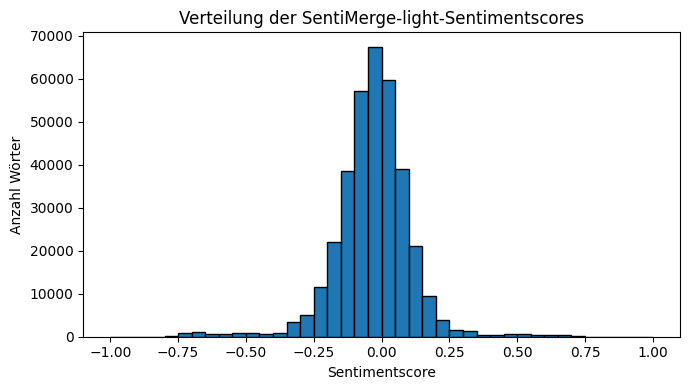

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("SentiMerge_score_light.csv")

# Histogramm
plt.figure(figsize=(7, 4))
plt.hist(df["senti_merge_score"].dropna(), bins=40, range=(-1, 1), edgecolor="black")
plt.xlabel("Sentimentscore")
plt.ylabel("Anzahl Wörter")
plt.title("Verteilung der SentiMerge-light-Sentimentscores")

plt.tight_layout()
plt.savefig("hist_SentiMerge.png", dpi=300)
plt.show()